In [1]:
using ThinkJulia

┌ Info: Precompiling ThinkJulia [d92244c1-9090-5a36-a620-f6fb516cc00e]
└ @ Base loading.jl:1186


# Exercise 4.8

In [101]:
function polyline(t, n, len, angle)
    for i in 1:n
        forward(t, len)
        turn(t, -angle)
    end
end

polyline (generic function with 1 method)

In [3]:
function polygon(t, n, len)
    angle = 360 / n
    polyline(t, n, len, angle)
end

polygon (generic function with 1 method)

In [4]:
function arc(t, r, angle)
    arc_len = 2 * π * r * angle / 360
    n = trunc(arc_len / 3) + 1
    step_len = arc_len / n
    step_angle = angle / n
    polyline(t, n, step_len, step_angle)
end

arc (generic function with 1 method)

In [5]:
function circle(t, r)
    arc(t, r, 360)
end

circle (generic function with 1 method)

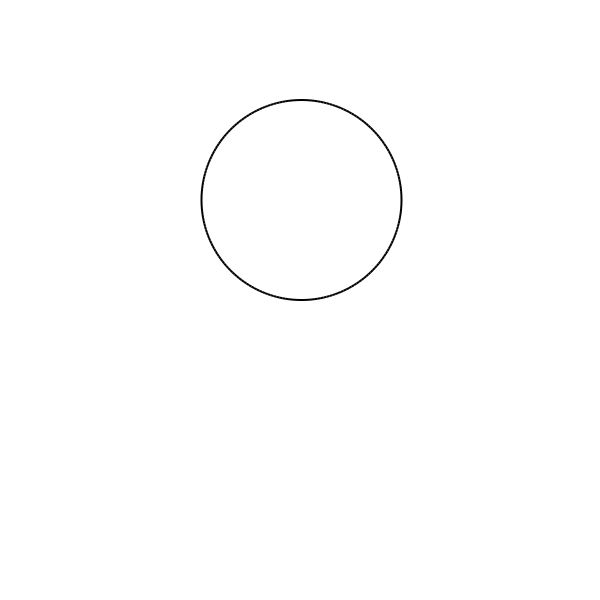

In [6]:
🐢 = Turtle()
@svg begin
    circle(🐢, 100)
end

# Exercise 4.9

In [7]:
"""
arc(t, r, angle)

Draws an arc with the given radius and angle:

    t: turtle
    r: radius
    angle: angle subtended by the arc, in degrees
"""
function arc(t, r, angle)
    arc_len = 2 * π * r * abs(angle) / 360
    n = trunc(arc_len / 4) + 3
    step_len = arc_len / n
    step_angle = angle / n

    # making a slight left turn before starting reduces
    # the error caused by the linear approximation of the arc
    turn(t, -step_angle/2)
    polyline(t, n, step_len, step_angle)
    turn(t, step_angle/2)
end

arc

In [8]:
function petal(t, length, width)
    R = (length ^ 2 / (8 * width / 2)) + width / 4
    theta = 2 * asin(length / (2 * R)) * 360 / (2 * π)
    for i in 1:2
        arc(t, R, theta)
        turn(t, -(360 - 2 * theta) / 2)
    end
end

petal (generic function with 1 method)

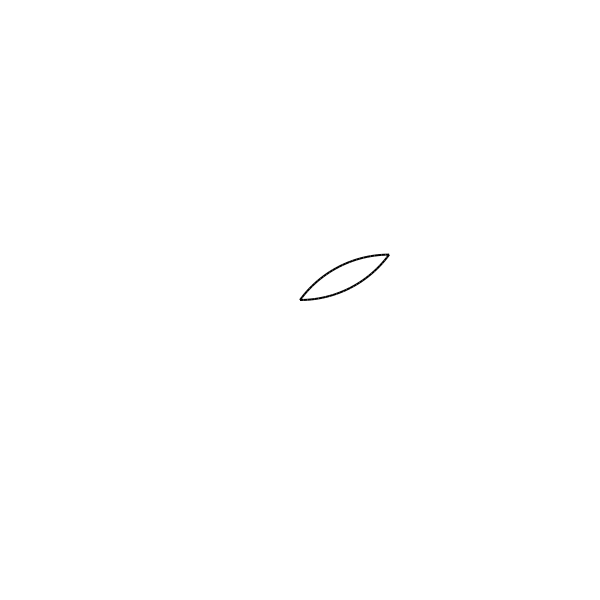

In [11]:
🐢 = Turtle()
@svg begin
    petal(🐢, 100, 24)
end

In [9]:
function flower(t, petal_length, petal_width, n)
    for i in 1:n
        petal(t, petal_length, petal_width)
        turn(t, -360 / n)
    end
end

flower (generic function with 1 method)

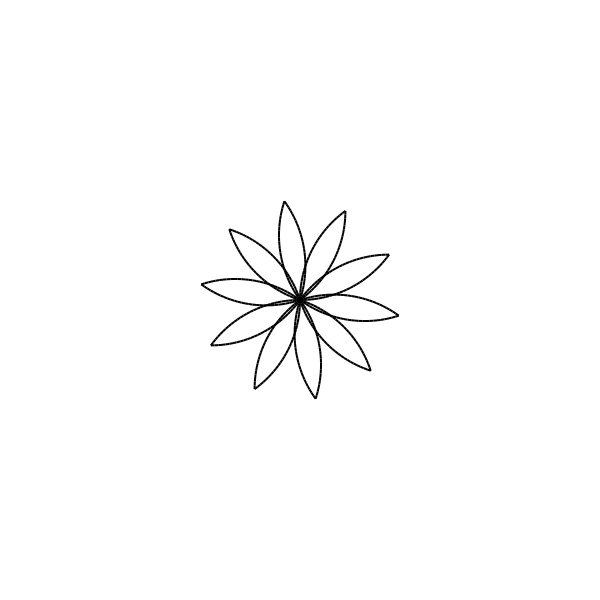

In [10]:
🐢 = Turtle()
@svg begin
    flower(🐢, 100, 24, 10)
end

# Exercise 4.10

In [75]:
function iso_triangle(t, edge_length, incl_angle)
    c = sin((incl_angle * 2 * pi / 360) / 2) * 2 * edge_length
    h = sqrt(4 * edge_length ^ 2 - c ^2) / 2
    alpha = asin(h / edge_length) * 360 / (2 * π)
    forward(t, edge_length)
    turn(t, -(180 - alpha))
    forward(t, c)
    turn(t, -(180 - alpha))
    forward(t, edge_length)
    turn(t, -(180 - incl_angle))
end

iso_triangle (generic function with 1 method)

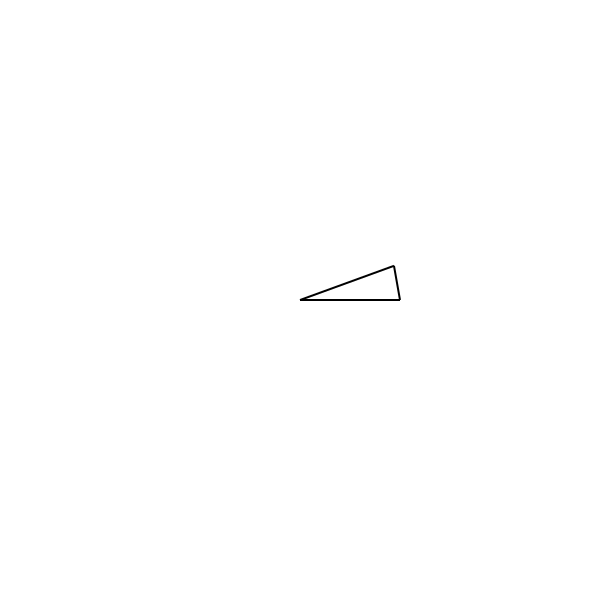

In [76]:
🐢 = Turtle()
@svg begin
    iso_triangle(🐢, 100, 20)
end

In [77]:
function pie(t, edge_length, n)
    angle = 360 / n
    for i in 1:n
        iso_triangle(t, edge_length, angle)
        turn(t, -angle)
    end
end

pie (generic function with 1 method)

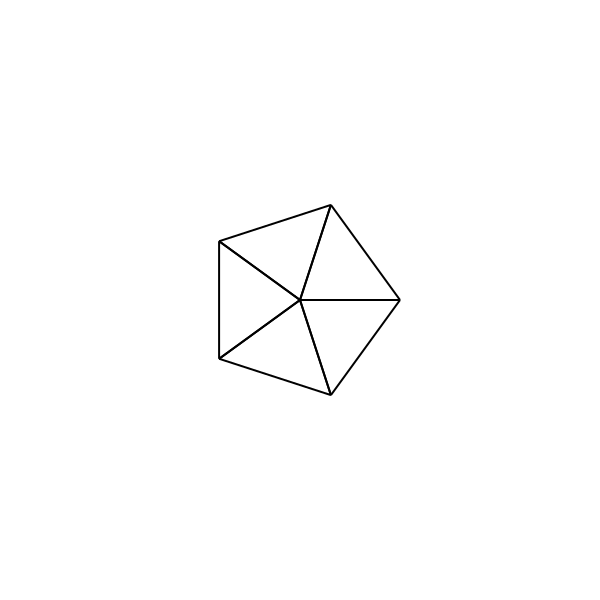

In [103]:
🐢 = Turtle()
@svg begin
    pie(🐢, 100, 5)
end

# Exercise 4.11

Not implemented for now

# Exercise 4.12

In [144]:
function archimedan(t, n, alpha, beta)
    degrees = trunc(n * 360)
    step_size = .1
    prev_x = 0
    prev_y = 0
    for i in 1:degrees
        r = alpha  + beta * i
        x = cos(i * 2 * π / 360) * r
        y = sin(i * 2 * π / 360) * r
        x_step = x - prev_x
        y_step = y - prev_y
        forward(t, x_step)
        turn(t, -90)
        forward(t, y_step)
        turn(t, 90)
        prev_x = x
        prev_y = y
    end
end

archimedan (generic function with 1 method)

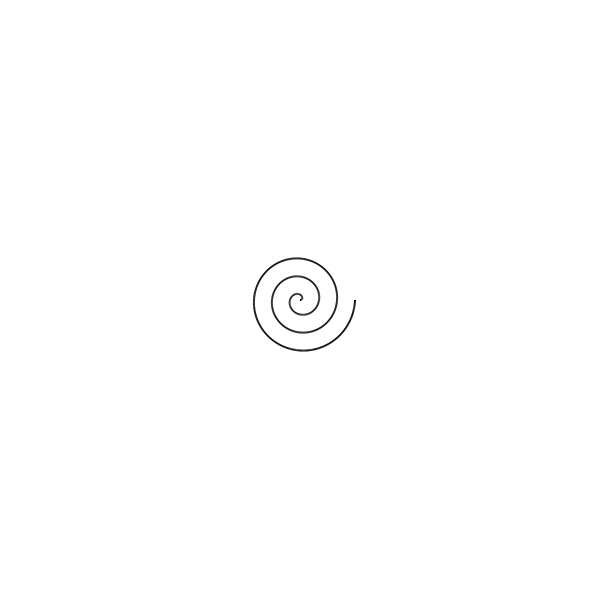

In [145]:
🐢 = Turtle()
@svg begin
    archimedan(🐢, 3, 1, .05)
end